# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# **IMPORT DATASET**

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1qqOtkKzCvyJwnhv5eqBv4u0-Ci-Wjrsn")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# **PREPROCESSING**

In [3]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [8]:
df['Cloud Cover'].value_counts()

,count
Cloud Cover,
overcast,6090
partly cloudy,4560
clear,2139
cloudy,411


In [9]:
df['Season'].value_counts()

,count
Season,
Winter,5610
Spring,2598
Autumn,2500
Summer,2492


In [10]:
df['Location'].value_counts()

,count
Location,
inland,4816
mountain,4813
coastal,3571


In [11]:
df['Weather Type'].value_counts()

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [12]:
replacements = {
    'Cloud Cover' : {'overcast' :0, 'partly cloudy' :1, 'clear' :2, 'cloudy' : 3},
    'Season' : {'Winter' :0, 'Spring' : 1, 'Autumn' :2,'Summer' :3},
    'Location' : {'inland' : 0, 'mountain' :1, 'coastal' :2},
    'Weather Type' : {'Rainy' :0, 'Cloudy' :1, 'Sunny' :2, 'Snowy' :3}

}

df = df.replace(replacements, inplace=False)
df.head()

/tmp/ipython-input-2273348971.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements, inplace=False)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,2,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,2,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,0,990.67,1,0,2.5,1,0


In [13]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


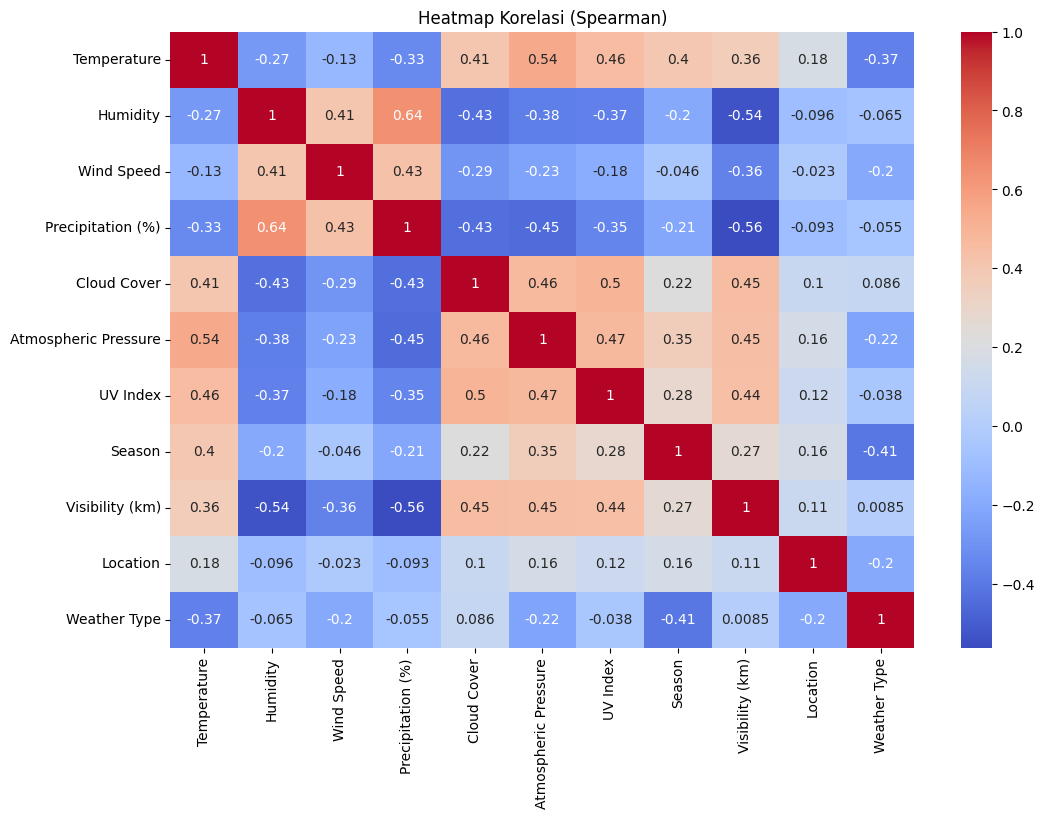

In [14]:
#Menghitung matriks korelasi menggunakan spearman
correlation_matrix = df.corr(method='spearman')

#Membuat Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap Korelasi (Spearman)')
plt.show()

# **SPLIT DATASET**

In [21]:
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nJumlah data train : {len(X_train)}")
print(f"Jumlah data test  : {len(X_test)}")


Jumlah data train : 10560
Jumlah data test  : 2640


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **BUILD & PREDIKSI MODEL**

In [24]:
k = 5  # Tetangga terdekat
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model.predict(X_test_scaled)

# **EVALUASI MODEL**

In [33]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       647
           1       0.86      0.86      0.86       651
           2       0.93      0.88      0.90       641
           3       0.95      0.94      0.94       701

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.90      0.89      0.89      2640



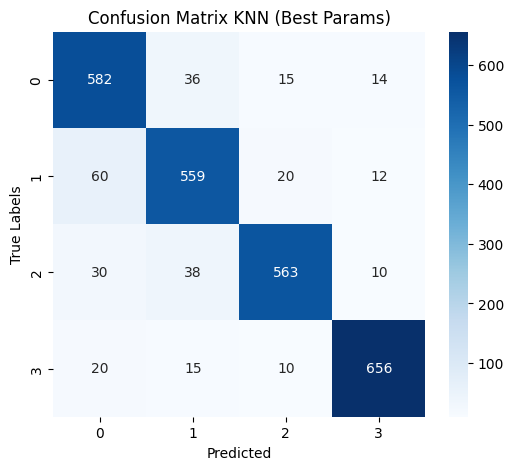

In [34]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix KNN (Best Params)')
plt.xlabel('Predicted')
plt.ylabel('True Labels')
plt.show()

# **CROSS VALIDATION**

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5)

print("CV Mean:", scores.mean())
print("CV Std:", scores.std())

CV Mean: 0.8875757575757577
CV Std: 0.0031364002340127876


# **MENENTUKAN NILAI K OPTIMAL DENGAN ELBOW METHOD**

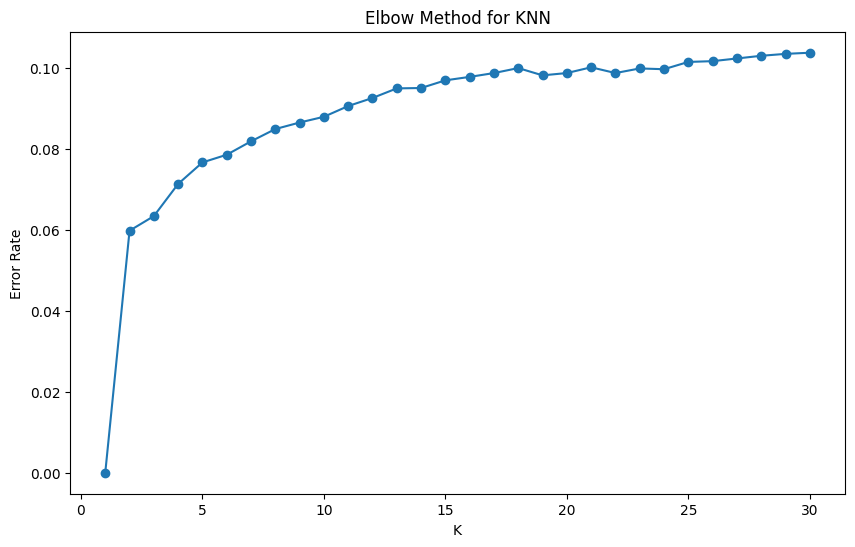

In [42]:
errors = []

for k in range(1, 31):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train, y_train)
  pred = knn_temp.predict(X_train)
  errors.append(np.mean(pred != y_train))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title('Elbow Method for KNN')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()